<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/Outlier_Detection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Local Outlier Factor (LOF)

LOF is an unsupervised (well, semi-supervised) machine learning algorithm that uses the density of data points in the distribution as a key factor to detect outliers.<br>
LOF compares the density of any given data point to the density of its neighbors. Since outliers come from low-density areas, the ratio will be higher for anomalous data points. As a rule of thumb, a normal data point has a LOF between 1 and 1.5 whereas anomalous observations will have much higher LOF. The higher the LOF the more likely it is an outlier. If the LOF of point X is 5, it means the average density of X’s neighbors is 5 times higher than its local density.

In [ ]:
# data preparation
import pandas as pd
import numpy as np
# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])

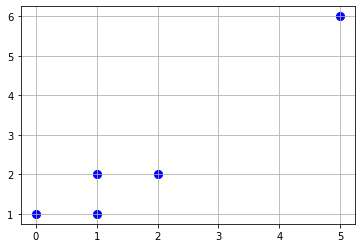

In [ ]:
# plot data points
plt.scatter(df["x"], df["y"], color = "b", s = 65)
plt.grid()

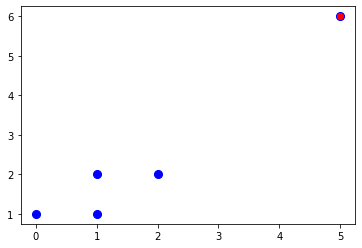

In [ ]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(df)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_values = df.iloc[outlier_index]
# plot data
plt.scatter(df["x"], df["y"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["x"], outlier_values["y"], color = "r")

## 2. Elliptical Envelope

Elliptical Envelope— creates an imaginary elliptical area around a given dataset. Values that fall inside the envelope are considered normal data and anything outside the envelope is returned as outliers. So, naturally, the red data points in the above diagram should be identified as outliers by this algorithm. As evident from this figure, the algorithm works best if data has a Gaussian distribution.<br>
<br>
<center>
<img  src="https://github.com/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/Screenshots/Elliptical%20Envelope.png?raw=1" ></center>

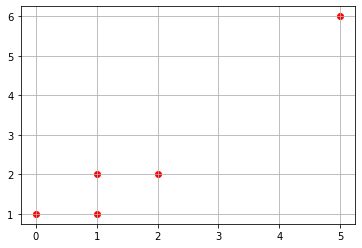

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

# create a dataframe
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])
# show data in a scatterplot
plt.scatter(df["x"], df["y"], color = "r")
plt.grid()

In [2]:
# convert dataframe to arrays
data = df[['x', 'y']].values

In [3]:
# instantiate model
# contamination basically defines the proportion of values that will be identified as outliers. The parameter value ranges between 0 and 0.5
model1 = EllipticEnvelope(contamination = 0.1)  
# fit model
model1.fit(data)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

In [4]:
# new data for prediction (data needs to be in arrays)
new_data = np.array([[10,10], [1,1], [1,1], [1,1]])
# predict on new data 
pred1 = model1.predict(new_data)
print(pred1)

[-1  1  1  1]


The negative value(s) are outliers

##3. Isolation Forest

In [5]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(data)

# new data for prediction (data needs to be in arrays)
new_data = np.array([[10,10], [1,1], [1,1], [1,1]])
# predict on new data 
clf.predict(new_data)

array([-1,  1,  1,  1])

1. [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
2. [How does it work](https://blog.paperspace.com/anomaly-detection-isolation-forest/#:~:text=Isolation%20forest%20is%20a%20machine%20learning%20algorithm%20for%20anomaly%20detection.&text=Isolation%20Forest%20is%20based%20on,min%20values%20of%20that%20feature.)


## PyOD 
Detecting and treating outliers is also a major cog in the data exploration stage. The quality of your inputs decide the quality of your output!

[PyOD](https://github.com/yzhao062/pyod) is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single [well-documented](https://pyod.readthedocs.io/en/latest/) API.

In [ ]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!